In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [38]:
data = pd.read_csv('C:/Users/minha/Github/Data/age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


<Axes: xlabel='gender', ylabel='count'>

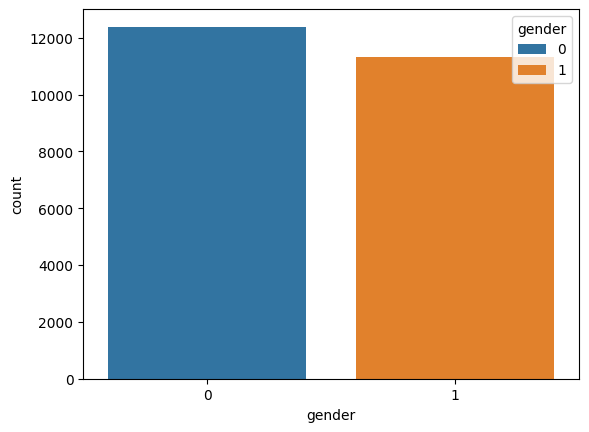

In [39]:
sns.countplot(data=data, x='gender', hue='gender')

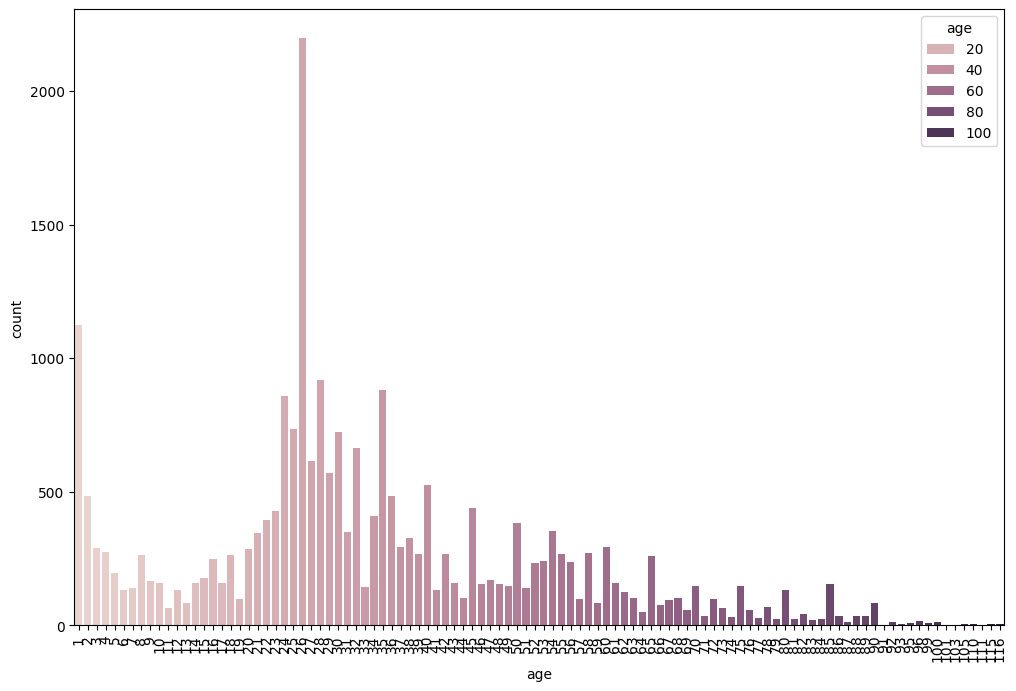

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='age', hue='age')
plt.xticks(rotation=90);

In [41]:
data['pixels'] = data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))
data['pixels'][0]

array([129., 128., 128., ..., 146., 146., 146.], dtype=float32)

In [42]:
X = np.array(data['pixels'].tolist())
X = X.reshape(-1,48,48,1)
print(X.shape)
X[0].shape

(23705, 48, 48, 1)


(48, 48, 1)

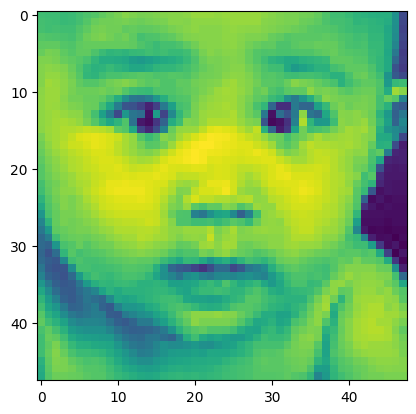

In [43]:
plt.imshow(X[0])

In [44]:
y_age = data['age']
y_age.shape

(23705,)

In [67]:
x_train, x_test, y_age_train, y_age_test = train_test_split((X/255), y_age, test_size=0.2, random_state=101)
x_age_val, x_age_test, y_age_val, y_age_test = train_test_split(x_test, y_age_test, test_size=0.5, random_state=101)

In [77]:
model_age = keras.Sequential()

model_age.add(Conv2D(16, kernel_size=(3,3), padding="same", activation="relu", input_shape=(48, 48, 1)))
model_age.add(Conv2D(16, kernel_size=(3,3), padding="same", activation="relu"))
model_age.add(MaxPooling2D((2, 2), strides=(2, 2))) 

model_age.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
model_age.add(Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
model_age.add(MaxPooling2D((2, 2), strides=(2, 2))) 
'''
model_age.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_age.add(Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model_age.add(MaxPooling2D((2, 2), strides=(2, 2)))
'''
model_age.add(Flatten())
model_age.add(Dense(2000, activation="relu"))
model_age.add(Dense(100, activation="softmax"))

model_age.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 conv2d_99 (Conv2D)          (None, 48, 48, 16)        2320      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 24, 24, 32)        4640      
                                                                 
 conv2d_101 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                

In [78]:
model_age.compile(optimizer='adam', loss='KLDivergence', metrics=['accuracy'])
model_age.fit(x_train, y_age_train, batch_size=128, verbose=1, epochs=5, validation_data=(x_age_val, y_age_val), shuffle=False)

Epoch 1/5
149/149 [==============================] - 4s 26ms/step - loss: 460.5185 - accuracy: 0.0091 - val_loss: 460.5170 - val_accuracy: 0.0105
Epoch 2/5
149/149 [==============================] - 4s 25ms/step - loss: 460.5164 - accuracy: 0.0101 - val_loss: 460.5170 - val_accuracy: 0.0122
Epoch 3/5
149/149 [==============================] - 3s 23ms/step - loss: 460.5164 - accuracy: 0.0112 - val_loss: 460.5170 - val_accuracy: 0.0110
Epoch 4/5
149/149 [==============================] - 3s 22ms/step - loss: 460.5164 - accuracy: 0.0126 - val_loss: 460.5170 - val_accuracy: 0.0093
Epoch 5/5
149/149 [==============================] - 3s 22ms/step - loss: 460.5164 - accuracy: 0.0108 - val_loss: 460.5170 - val_accuracy: 0.0093
